In [154]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [155]:
iris = load_iris()
cols = ['spl', 'spw', 'ptl', 'ptw']
df = pd.DataFrame(iris.data, columns=cols)

df.head()

,spl,spw,ptl,ptw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


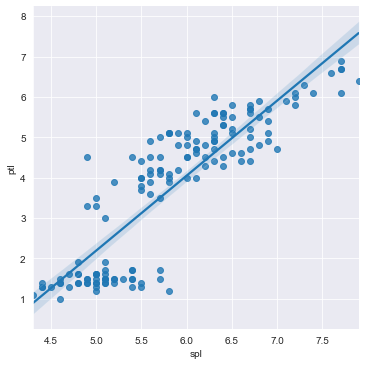

In [156]:
x = df.spl.values.reshape(-1, 1)
y = df.ptl.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

sns.set_style('darkgrid')
# sns.lmplot(x=df.spl, y=df.ptl)
sns.lmplot(data=df, x='spl', y='ptl')

<Figure size 216x144 with 0 Axes>

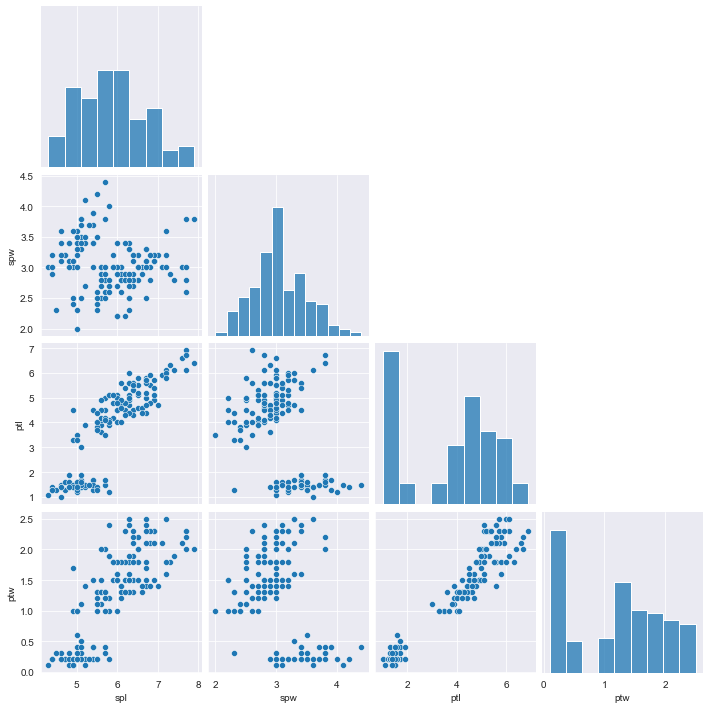

<Figure size 216x144 with 0 Axes>

In [157]:
sns.pairplot(data=df, corner=True)
plt.figure(figsize=(3,2))

In [158]:
model.score(x, y) * 100

75.99546457725151

In [159]:
from sklearn.metrics import r2_score
y_pred = model.predict(x)
score1 = r2_score(y, y_pred) * 100
score1

75.99546457725151

<AxesSubplot:>

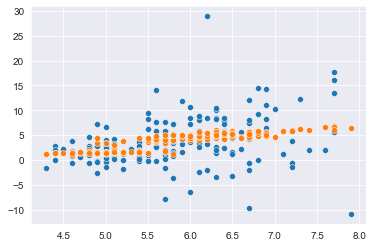

In [160]:
y2 = y.copy().flatten() * (np.random.randn(len(y)) * 1.1 + 1) 
# y2

sns.set_style('darkgrid')
sns.scatterplot(x=x.flatten(), y=y2, ) # blue
sns.scatterplot(x=x.flatten(), y=y.flatten()) # orange
# pd.Series(x.flatten())
# type(df.spl)

In [161]:
model.fit(x, y2)
y_pred2 = model.predict(x)
score2 = r2_score(y, y_pred2) * 100
score2 

75.53463945874162

## Model accuracy comparision

In [162]:
print(f'model1 score : {score1.round(2) }')
print(f'model2 score : {score2.round(2)}')
print(f'model 1 has accuracy more than model 2 : {(score1/score2).round(2)}')

model1 score : 76.0
model2 score : 75.53
model 1 has accuracy more than model 2 : 1.01


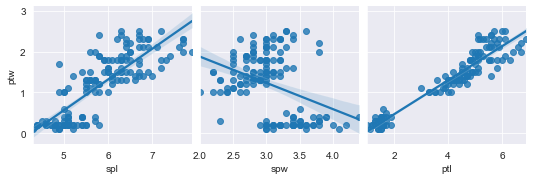

In [179]:
# corner=True, can't compate with y_vars kw
g = sns.pairplot(df, x_vars=['spl', 'spw', 'ptl'], y_vars='ptw', kind='reg', 
                palette='Set2')
# g.y_vars

In [184]:
feature_cols = ['spl', 'spw', 'ptl']
X =df[feature_cols]
y = df.ptw

model = LinearRegression()
model.fit(X, y)
print(f'm123 : {model.coef_}')
print(f'b : {model.intercept_}')

m123 : [-0.20726607  0.22282854  0.52408311]
b : -0.2403073891122598


In [185]:
list(zip(feature_cols, model.coef_))

[('spl', -0.20726607375742634),
 ('spw', 0.22282854386093012),
 ('ptl', 0.5240831147784291)]

In [187]:
model.score(X, y) * 100

93.78502736046809

In [189]:
x_input = [[5,5,5]]
model.predict(X=x_input)

/home/liberio/miniconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.45792054])